c:\IIUM\AI Note IIUM\venv\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


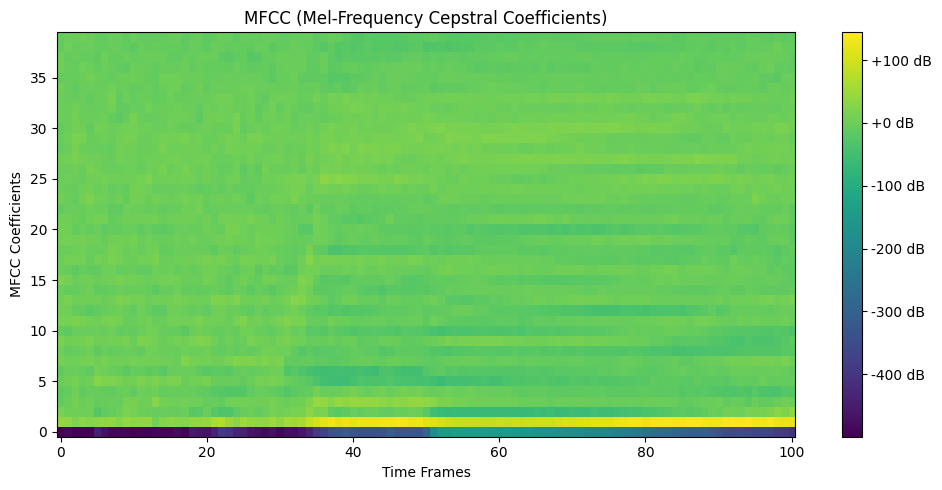

In [6]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# Load audio file
waveform, sample_rate = torchaudio.load("Data_Google/Testing/No/0a9f9af7_nohash_0.wav")

# Convert to mono
if waveform.shape[0] > 1:
    waveform = waveform.mean(dim=0, keepdim=True)

# Create MFCC transform
mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=40,
    melkwargs={
        'n_fft': 400,
        'hop_length': 160,
        'n_mels': 128
    }
)

# Compute MFCC
mfcc = mfcc_transform(waveform)

# Remove batch dim (1, n_mfcc, time) → (n_mfcc, time)
mfcc = mfcc.squeeze(0)

# Plot MFCC
plt.figure(figsize=(10, 5))
plt.imshow(mfcc, origin='lower', aspect='auto', cmap='viridis')
plt.title("MFCC (Mel-Frequency Cepstral Coefficients)")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()
